 # Installing praw and pandas

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw
import pandas as pd

#creating an instance of reddit
reddit = praw.Reddit(client_id='-CtkxyWHYMgNXw', \
                     client_secret='j9jpP6IkuXbZPO0Y3K7M5e1IDNuUxg', \
                     user_agent='scrape redit', \
                     username='Limp_Worldliness_500', \
                     password='Newpassword1!')

In [3]:
print(reddit.user.me()) #trying to validate user

Limp_Worldliness_500


# Getting the subreddit

In [4]:
subreddit = reddit.subreddit("Barca")
top_subreddit = subreddit.top(limit=1500)
top_subreddit

In [5]:
topics_dict = { "title":[], \
                "score":[], \
                "id":[], "url":[], \
               "comms_num": [], \
                "created": [], \
                "body":[]}
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [6]:
for submission in subreddit.top(limit=10):
    print(submission.selftext)
    

In [7]:
topics_data = pd.DataFrame(topics_dict)
topics_data.tail()

,title,score,id,url,comms_num,created,body
991,Messi is LaLiga‘s Player of the month for Febr...,494,fecla2,https://mobile.twitter.com/laliga/status/12358...,23,1.583525e+09,
992,Happy Birthday Nelsinho,499,dx6kna,https://i.redd.it/znvcksysp1z31.jpg,14,1.573938e+09,
993,Had the pleasure of seeing a masterclass perfo...,501,copsnp,https://i.redd.it/46z2060yopf31.jpg,21,1.565511e+09,
994,He’s here,497,c94nx2,https://v.redd.it/kn1vawbleb831,44,1.562287e+09,
995,I tried to do a sketch of the Greatest player ...,496,al3y14,https://i.redd.it/2l3umn483fd21.jpg,28,1.548820e+09,


In [8]:
import datetime as dt
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = topics_data["created"].apply(get_date)

topics_data = topics_data.assign(timestamp = _timestamp)

topics_data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Messi dedicates his goal to the late Diego Mar...,3127,k3ak37,https://v.redd.it/abtyrwutz6261,106,1.606690e+09,,2020-11-29 16:50:58
1,The most beautiful video you will see today. E...,3097,mt07a7,https://v.redd.it/tsx15en54tt61,147,1.618726e+09,,2021-04-18 01:06:11
2,11-year-long project. 1 shirt per season. My f...,3027,fadjjt,https://i.redd.it/a9rctppwghj41.jpg,184,1.582845e+09,,2020-02-27 17:16:50
3,La remontada 2.0,2809,m3zdni,https://v.redd.it/egenaevd7qm61,145,1.615640e+09,,2021-03-13 06:50:17
4,A legend of the game Best no.9 to ever grace t...,2601,iytf5n,https://i.redd.it/bldig8kd42p51.png,139,1.600965e+09,,2020-09-24 11:33:31


In [9]:
topics_data["timestamp"].unique()

array(['2020-11-29T16:50:58.000000000', '2021-04-18T01:06:11.000000000',
       '2020-02-27T17:16:50.000000000', '2021-03-13T06:50:17.000000000',
       '2020-09-24T11:33:31.000000000', '2020-12-10T17:16:28.000000000',
       '2021-04-25T21:08:48.000000000', '2020-10-27T21:58:15.000000000',
       '2021-01-14T00:44:24.000000000', '2020-12-17T04:45:31.000000000',
       '2020-10-31T02:45:44.000000000', '2020-10-27T23:10:52.000000000',
       '2021-04-11T00:35:12.000000000', '2020-12-24T15:32:13.000000000',
       '2021-03-08T00:48:58.000000000', '2021-04-23T09:52:02.000000000',
       '2020-08-24T02:39:11.000000000', '2021-04-27T14:10:03.000000000',
       '2021-02-08T08:38:51.000000000', '2020-08-25T20:08:32.000000000',
       '2019-08-16T20:09:20.000000000', '2020-10-28T17:36:47.000000000',
       '2021-03-12T21:39:02.000000000', '2017-03-08T23:46:15.000000000',
       '2021-05-10T13:01:58.000000000', '2020-11-07T21:50:14.000000000',
       '2019-08-20T22:22:48.000000000', '2020-07-18

GET BODY OF POST WITH THE MOST COMMENTS or COMMENTS OF THE MOST POPULAR POST

In [10]:
comments_dict = {
            "comment_id" : [],      #unique comm id
            "comment_parent_id" : [],   # comment parent id
            "comment_body" : [],   # text in comment
            "comment_link_id" : []  #link to the comment
        }
submission.comments.replace_more(limit = 1)
for comment in submission.comments.list():
    comments_dict["comment_id"].append(comment.id)
    comments_dict["comment_parent_id"].append(comment.parent_id)
    comments_dict["comment_body"].append(comment.body)
    comments_dict["comment_link_id"].append(comment.link_id)
                
comments_data =pd.DataFrame(comments_dict)
comments_data.head()

,comment_id,comment_parent_id,comment_body,comment_link_id
0,gg3prbh,t3_keoj8j,Things like this I would show my kids and tell...,t3_keoj8j
1,gg3sht9,t3_keoj8j,***ART***,t3_keoj8j
2,gg46ql8,t3_keoj8j,How blessed were we to have witnessed some of ...,t3_keoj8j
3,gg3p7la,t3_keoj8j,Legends!!!!,t3_keoj8j
4,gg4b6a8,t3_keoj8j,I mean it’s pretty much impossible to play foo...,t3_keoj8j


In [11]:
submission.comments.replace_more(limit=0)
for comment in submission.comments.list():
    print(comment.body)
comments=comment.body
comments

Things like this I would show my kids and tell them how much we loved seeing these legends play 😭
***ART***
How blessed were we to have witnessed some of the most beautiful football ever played? So many magical moments with Barca.
Legends!!!!
I mean it’s pretty much impossible to play football like that
Good old days where I'd never miss a minute of a Barca game...
pisses me off when this happens in fifa, but not when messi does it
I am glad I knew what I was watching then and embraced and enjoyed every moment , took days off work would always make it an event. 
Good times.
This should be marked NSFW for all the right reasons😌
Iniesta was absolutely fabulous but omg Messi is something else I swear
Please show this to whoever tells you that Leo isn't the goat
Messi’s footwork is truly out of this world! How can a human be so good at controlling the ball so immaculately with such fine precise touches while having split second reaction to his surroundings? Just how?
Don't make me cry 😭
Th

'Jesus guys, this is the 16/17 season.'

# Cleaning the data

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import string
WordNetLemmatizer = ''
def clean_text(txt): 
#make string lowercase 
    txt = str(comments)
    txt = text.lower()
    
#remove links
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt, flags=re.MULTILINE)

#tokenize. i.e. identify individual words.
    tokens = nltk.word_tokenize(txt) 
    clean_text = []
    
#remove stopwords, puncuation, then lemmatize i.e. remove grammatical endings -ing, -s, -ed etc.
    stoplist = set(stopwords.words("english"))
    Lemmatizer = WordNetLemmatizer()
    for word in tokens:
        if (word not in stoplist and word not in string.punctuation): 
            
            token = Lemmatizer.lemmatize(word)
            clean_text.append(token)
            
#remove words of length 3 or smaller        
    clean_text = [token for token in clean_text if len(token) > 3] 
    return clean_text
    clean_text(txt)

In [13]:
df=topics_data
df = df.drop(['url'],axis=1)
df=df.drop(["id"],axis=1)
df=df.drop(["score"],axis=1)
df=df.drop(["comms_num"],axis=1)
df=df.drop(["created"],axis=1)
#df=df.drop(["comments"],axis=1)
text = str(df)

# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic such as emojis
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])



['title', 'body', 'messi', 'dedicates', 'goal', 'late', 'diego', 'mar', 'beautiful', 'video', 'see', 'today', 'e', 'project', 'shirt', 'per', 'season', 'f', 'la', 'remontada', 'legend', 'game', 'best', 'ever', 'grace', 'messi', 'laliga', 'player', 'month', 'febr', 'happy', 'birthday', 'nelsinho', 'pleasure', 'seeing', 'masterclass', 'perfo', 'tried', 'sketch', 'greatest', 'player', 'timestamp', 'rows', 'x', 'columns']


In [14]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize



analyzer = SentimentIntensityAnalyzer()

text = str(df)
sents = nltk.sent_tokenize(text)
for s in sents:
    snt = analyzer.polarity_scores(s)
    print("{:-<40} {}".format(s, str(snt)))
        
    with open("vader.txt", "a",encoding="utf-8") as vader_txt:
            vader_txt.write("{:-<40} {}".format(s, str(snt)) + "\n")

                                                 title body  \
0    Messi dedicates his goal to the late Diego Mar...        
1    The most beautiful video you will see today. {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.6361}
E...        
2    11-year-long project.- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1 shirt per season.--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
My f...        
3                                     La remontada 2.0        
4    A legend of the game Best no.9 to ever grace t...        
..                                                 ...  ...   
991  Messi is LaLiga‘s Player of the month for Febr...        
992                            Happy Birthday Nelsinho        
993  Had the pleasure of seeing a masterclass perfo...        
994                                          He’s here        
995  I tried to do a sketch of the Greatest player ...        

              timestamp  
0   2020-11-29 16:50:58  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\teddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
text = str(comments)
sents = nltk.sent_tokenize(text)
for s in sents:
    snt = analyzer.polarity_scores(s)
    print("{:-<40} {}".format(s, str(snt)))
        
    with open("vader.txt", "a",encoding="utf-8") as vader_txt:
            vader_txt.write("{:-<40} {}".format(s, str(snt)) + "\n")

Jesus guys, this is the 16/17 season.--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [16]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize



analyzer = SentimentIntensityAnalyzer()

text2 = comments
sents2 = nltk.sent_tokenize(text2)
for s in sents2:
    snt = analyzer.polarity_scores(s)
    print("{:-<40} {}".format(s, str(snt)))
        
    with open("vader.txt", "a",encoding="utf-8") as vader_txt:
            vader_txt.write("{:-<40} {}".format(s, str(snt)) + "\n")

Jesus guys, this is the 16/17 season.--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\teddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
df.head()

,title,body,timestamp
0,Messi dedicates his goal to the late Diego Mar...,,2020-11-29 16:50:58
1,The most beautiful video you will see today. E...,,2021-04-18 01:06:11
2,11-year-long project. 1 shirt per season. My f...,,2020-02-27 17:16:50
3,La remontada 2.0,,2021-03-13 06:50:17
4,A legend of the game Best no.9 to ever grace t...,,2020-09-24 11:33:31


In [18]:
df['polarity scores'] = df['title'].apply(lambda review: analyzer.polarity_scores(review))

df.head()

,title,body,timestamp,polarity scores
0,Messi dedicates his goal to the late Diego Mar...,,2020-11-29 16:50:58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,The most beautiful video you will see today. E...,,2021-04-18 01:06:11,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp..."
2,11-year-long project. 1 shirt per season. My f...,,2020-02-27 17:16:50,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
3,La remontada 2.0,,2021-03-13 06:50:17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,A legend of the game Best no.9 to ever grace t...,,2020-09-24 11:33:31,"{'neg': 0.185, 'neu': 0.523, 'pos': 0.292, 'co..."


In [19]:
df['compound']  = df['polarity scores'].apply(lambda score_dict: score_dict['compound'])
df.head(1)

,title,body,timestamp,polarity scores,compound
0,Messi dedicates his goal to the late Diego Mar...,,2020-11-29 16:50:58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [40]:
df['polarity value'] = df['compound'].apply(lambda c: 'positive' if c >=0.05 else 'negative')
df.head()

,title,body,timestamp,polarity scores,compound,polarity value
0,Messi dedicates his goal to the late Diego Mar...,,2020-11-29 16:50:58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
1,The most beautiful video you will see today. E...,,2021-04-18 01:06:11,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.6361,positive
2,11-year-long project. 1 shirt per season. My f...,,2020-02-27 17:16:50,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.4588,positive
3,La remontada 2.0,,2021-03-13 06:50:17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,negative
4,A legend of the game Best no.9 to ever grace t...,,2020-09-24 11:33:31,"{'neg': 0.185, 'neu': 0.523, 'pos': 0.292, 'co...",0.5423,positive


In [41]:
df["polarity value"].value_counts()

positive    525
negative    471
Name: polarity value, dtype: int64

In [28]:
analyzer = SentimentIntensityAnalyzer()
sub_entries_nltk = {'negative': 0, 'positive' : 0, 'neutral' : 0}
topics_dict2 = str(df)
def nltk_sentiment(review, sub_entries_nltk):
    vs = analyzer.polarity_scores(review)
    if not vs['neg'] > 0.05:
        if vs['pos'] - vs['neg'] > 0:
            sub_entries_nltk['positive']=sub_entries_nltk['positive'] + 1
            return 'Positive'
        else:
            sub_entries_nltk['neutral']=sub_entries_nltk['neutral'] + 1
            return 'Neutral'
    elif not vs['pos'] > 0.05:
        if vs['pos'] - vs['neg'] <= 0:
            sub_entries_nltk['negative']=sub_entries_nltk['negative'] + 1
            return 'Negative'
        else:
            sub_entries_nltk['neutral']=sub_entries_nltk['neutral'] + 1
            return 'Neutral'
    else:
        sub_entries_nltk['neutral']=sub_entries_nltk['neutral'] + 1
        return 'Neutral'
nltk_sentiment(topics_dict2,sub_entries_nltk)

'Neutral'

C:\Users\teddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


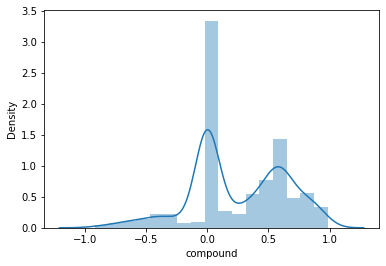

In [22]:
import seaborn as sns

sns.distplot(df["compound"])

C:\Users\teddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


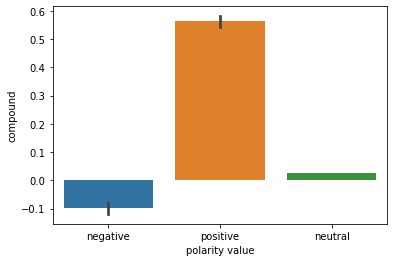

In [23]:
sns.barplot(df["polarity value"], df["compound"])

In [24]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\teddy\anaconda3\lib\site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


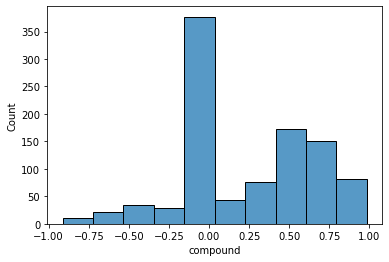

In [26]:
sns.histplot(df["compound"], bins = 10)

# Latent Dirichlet Allocation (for hidden topics)


In [29]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import models, corpora
from gensim.models.ldamulticore import LdaMulticore
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
#import multiprocessing
#from multiprocessing import Process, Queue

#multiprocessing.set_start_method("fork")
our_files = words

#with open('cleaned_text.txt') as f:
    #content = f.readlines()
content = [x.strip() for x in our_files] 

wordz = [[word for word in line.split()] for line in content]

# Create dictionary
dictionary = corpora.Dictionary(wordz)
corpus = [dictionary.doc2bow(line) for line in wordz]

# Get information about the dictionary
print(dictionary)

# Save the Dict and Corpus
dictionary.save('my_dict.dict')  # save dict to disk
corpora.MmCorpus.serialize('my_corpus.mm', corpus)  # save corpus to disk

# Load them back
loaded_dict = corpora.Dictionary.load('my_dict.dict')

corpus = corpora.MmCorpus('my_corpus.mm')

# Step 4: Train the LDA model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         random_state=100,
                         num_topics=5,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

# save the model
lda_model.save('lda_model.model')

# See the topics
print(lda_model.print_topics())

2021-05-13 19:36:31,156 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-13 19:36:31,157 : INFO : built Dictionary(43 unique tokens: ['title', 'body', 'messi', 'dedicates', 'goal']...) from 45 documents (total 45 corpus positions)
2021-05-13 19:36:31,159 : INFO : saving Dictionary object under my_dict.dict, separately None
2021-05-13 19:36:31,161 : INFO : saved my_dict.dict
2021-05-13 19:36:31,165 : INFO : storing corpus in Matrix Market format to my_corpus.mm
2021-05-13 19:36:31,167 : INFO : saving sparse matrix to my_corpus.mm
2021-05-13 19:36:31,170 : INFO : PROGRESS: saving document #0
2021-05-13 19:36:31,172 : INFO : saved 45x43 matrix, density=2.326% (45/1935)
2021-05-13 19:36:31,173 : INFO : saving MmCorpus index to my_corpus.mm.index
2021-05-13 19:36:31,176 : INFO : loading Dictionary object from my_dict.dict
2021-05-13 19:36:31,186 : INFO : loaded my_dict.dict
2021-05-13 19:36:31,189 : INFO : loaded corpus index from my_corpus.mm.index
2021-05-13 19:36:31

Dictionary(43 unique tokens: ['title', 'body', 'messi', 'dedicates', 'goal']...)


2021-05-13 19:36:33,980 : INFO : topic #0 (0.333): 0.027*"messi" + 0.027*"rows" + 0.026*"e" + 0.026*"project" + 0.026*"month" + 0.026*"grace" + 0.025*"legend" + 0.025*"per" + 0.025*"remontada" + 0.025*"sketch"
2021-05-13 19:36:33,983 : INFO : topic #1 (0.230): 0.030*"x" + 0.029*"game" + 0.028*"happy" + 0.027*"grace" + 0.027*"febr" + 0.027*"mar" + 0.025*"laliga" + 0.025*"birthday" + 0.025*"messi" + 0.025*"month"
2021-05-13 19:36:33,985 : INFO : topic #2 (0.176): 0.033*"timestamp" + 0.027*"project" + 0.027*"best" + 0.026*"month" + 0.026*"birthday" + 0.025*"messi" + 0.025*"columns" + 0.025*"video" + 0.025*"diego" + 0.024*"laliga"
2021-05-13 19:36:33,987 : INFO : topic #3 (0.142): 0.029*"rows" + 0.029*"timestamp" + 0.027*"per" + 0.027*"happy" + 0.026*"x" + 0.026*"seeing" + 0.026*"today" + 0.026*"grace" + 0.025*"project" + 0.025*"remontada"
2021-05-13 19:36:34,001 : INFO : topic #4 (0.119): 0.029*"sketch" + 0.029*"season" + 0.026*"late" + 0.026*"dedicates" + 0.026*"remontada" + 0.026*"beaut

2021-05-13 19:36:34,198 : INFO : topic #4 (0.119): 0.028*"sketch" + 0.028*"season" + 0.026*"late" + 0.025*"dedicates" + 0.025*"remontada" + 0.025*"beautiful" + 0.025*"nelsinho" + 0.025*"la" + 0.025*"diego" + 0.025*"grace"
2021-05-13 19:36:34,199 : INFO : topic diff=0.084694, rho=0.119484
2021-05-13 19:36:34,201 : INFO : PROGRESS: pass 7, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
2021-05-13 19:36:34,219 : INFO : topic #0 (0.333): 0.038*"messi" + 0.036*"player" + 0.026*"rows" + 0.026*"e" + 0.026*"project" + 0.025*"month" + 0.025*"grace" + 0.025*"legend" + 0.025*"per" + 0.025*"remontada"
2021-05-13 19:36:34,221 : INFO : topic #1 (0.230): 0.047*"x" + 0.046*"game" + 0.045*"happy" + 0.044*"febr" + 0.043*"laliga" + 0.024*"grace" + 0.023*"mar" + 0.022*"messi" + 0.022*"birthday" + 0.022*"month"
2021-05-13 19:36:34,223 : INFO : topic #2 (0.176): 0.054*"timestamp" + 0.026*"project" + 0.025*"best" + 0.025*"month" + 0.025*"birthday" + 0.024*"messi" + 0.024*"columns" + 0

[(0, '0.040*"messi" + 0.039*"player" + 0.026*"rows" + 0.026*"e" + 0.025*"project" + 0.025*"month" + 0.025*"legend" + 0.025*"grace" + 0.025*"per" + 0.025*"remontada"'), (1, '0.052*"x" + 0.051*"game" + 0.050*"happy" + 0.050*"febr" + 0.049*"laliga" + 0.022*"grace" + 0.022*"mar" + 0.021*"birthday" + 0.021*"messi" + 0.021*"month"'), (2, '0.061*"timestamp" + 0.025*"project" + 0.025*"best" + 0.025*"month" + 0.024*"birthday" + 0.024*"messi" + 0.024*"columns" + 0.024*"video" + 0.023*"diego" + 0.023*"laliga"'), (3, '0.028*"rows" + 0.027*"timestamp" + 0.026*"per" + 0.026*"happy" + 0.025*"x" + 0.025*"seeing" + 0.025*"today" + 0.025*"grace" + 0.025*"project" + 0.025*"remontada"'), (4, '0.027*"sketch" + 0.027*"season" + 0.025*"late" + 0.025*"dedicates" + 0.025*"remontada" + 0.025*"beautiful" + 0.025*"nelsinho" + 0.025*"la" + 0.024*"diego" + 0.024*"grace"')]


In [30]:
with open("lda_output.txt", "a",encoding="utf-8") as lda_txt:
            topics=lda_model.top_topics(corpus)
            lda_txt.write('\n'.join('%s %s' %topic for topic in topics))

In [31]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

2021-05-13 19:36:49,147 : INFO : topic #0 (0.333): 0.040*"messi" + 0.039*"player" + 0.026*"rows" + 0.026*"e" + 0.025*"project" + 0.025*"month" + 0.025*"legend" + 0.025*"grace" + 0.025*"per" + 0.025*"remontada"
2021-05-13 19:36:49,148 : INFO : topic #1 (0.230): 0.052*"x" + 0.051*"game" + 0.050*"happy" + 0.050*"febr" + 0.049*"laliga" + 0.022*"grace" + 0.022*"mar" + 0.021*"birthday" + 0.021*"messi" + 0.021*"month"
2021-05-13 19:36:49,150 : INFO : topic #2 (0.176): 0.061*"timestamp" + 0.025*"project" + 0.025*"best" + 0.025*"month" + 0.024*"birthday" + 0.024*"messi" + 0.024*"columns" + 0.024*"video" + 0.023*"diego" + 0.023*"laliga"
2021-05-13 19:36:49,151 : INFO : topic #3 (0.142): 0.028*"rows" + 0.027*"timestamp" + 0.026*"per" + 0.026*"happy" + 0.025*"x" + 0.025*"seeing" + 0.025*"today" + 0.025*"grace" + 0.025*"project" + 0.025*"remontada"
2021-05-13 19:36:49,152 : INFO : topic #4 (0.119): 0.027*"sketch" + 0.027*"season" + 0.025*"late" + 0.025*"dedicates" + 0.025*"remontada" + 0.025*"beaut

[(0,
  '0.040*"messi" + 0.039*"player" + 0.026*"rows" + 0.026*"e" + 0.025*"project" '
  '+ 0.025*"month" + 0.025*"legend" + 0.025*"grace" + 0.025*"per" + '
  '0.025*"remontada"'),
 (1,
  '0.052*"x" + 0.051*"game" + 0.050*"happy" + 0.050*"febr" + 0.049*"laliga" + '
  '0.022*"grace" + 0.022*"mar" + 0.021*"birthday" + 0.021*"messi" + '
  '0.021*"month"'),
 (2,
  '0.061*"timestamp" + 0.025*"project" + 0.025*"best" + 0.025*"month" + '
  '0.024*"birthday" + 0.024*"messi" + 0.024*"columns" + 0.024*"video" + '
  '0.023*"diego" + 0.023*"laliga"'),
 (3,
  '0.028*"rows" + 0.027*"timestamp" + 0.026*"per" + 0.026*"happy" + 0.025*"x" '
  '+ 0.025*"seeing" + 0.025*"today" + 0.025*"grace" + 0.025*"project" + '
  '0.025*"remontada"'),
 (4,
  '0.027*"sketch" + 0.027*"season" + 0.025*"late" + 0.025*"dedicates" + '
  '0.025*"remontada" + 0.025*"beautiful" + 0.025*"nelsinho" + 0.025*"la" + '
  '0.024*"diego" + 0.024*"grace"')]
